# Kaggle House Competition Notebook
This Notebook is inteded as an attempt at the kaggle house competition. It is meant to illustrate all aspects of workflow from Data loading over data analysis to model predictions

Import libraries

In [22]:
%load_ext autoreload
%autoreload 2

In [98]:
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm



Data loading

In [196]:
filename = "data/train.csv"
train = pd.read_csv(filename)
# print(train.isnull().sum().values)
train.shape


(1460, 81)

Data analysis

In [25]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Data Viz


/Users/jens/miniconda3/envs/stcti/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

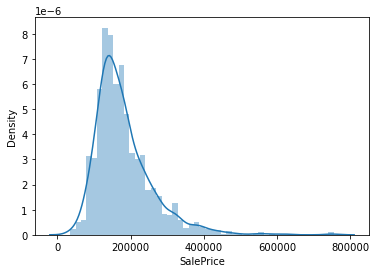

In [86]:
sns.distplot(train["SalePrice"])

<AxesSubplot:>

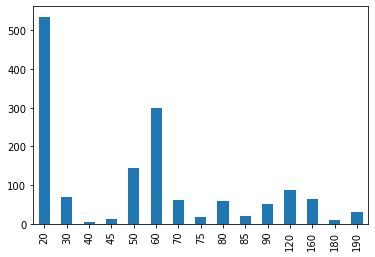

In [87]:
subclass = train["MSSubClass"]
subclass_counts = subclass.value_counts()
subclass_counts
subclasses = subclass.unique()
subclasses.sort()
subclass_counts = subclass_counts[subclasses]
subclass_counts.plot.bar()

<AxesSubplot:xlabel='MSSubClass', ylabel='SalePrice'>

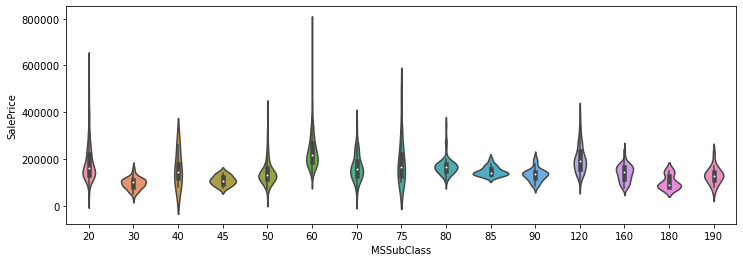

In [88]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (12,4))
sns.violinplot(data = train, x = "MSSubClass", y = "SalePrice" , ax = ax)

(array([536.,  69.,   4.,  12., 144., 299.,  60.,  16.,  58.,  20.,  52.,
         87.,  63.,  40.]),
 array([ 20,  30,  40,  45,  50,  60,  70,  75,  80,  85,  90, 120, 160,
        180, 190]),
 <BarContainer object of 14 artists>)

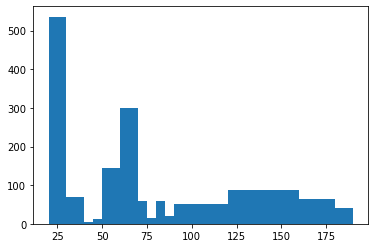

In [89]:
plt.hist(subclass, bins = subclasses)

## We go for a smaller model

In [90]:
columns_less = ['MSSubClass', 'LotFrontage', 'MasVnrType', 'OverallQual', 'LotArea', 'Neighborhood', 'GrLivArea', 'SalePrice']
train_small = train[columns_less]
train_small.head()

,MSSubClass,LotFrontage,MasVnrType,OverallQual,LotArea,Neighborhood,GrLivArea,SalePrice
0,60,65.0,BrkFace,7,8450,CollgCr,1710,208500
1,20,80.0,None,6,9600,Veenker,1262,181500
2,60,68.0,BrkFace,7,11250,CollgCr,1786,223500
3,70,60.0,None,7,9550,Crawfor,1717,140000
4,60,84.0,BrkFace,8,14260,NoRidge,2198,250000


In [91]:
train_small.Neighborhood.value_counts();


Filling nan values for the LotFrontage variables

In [92]:
# Checking nan values
index = train_small['LotFrontage'].isna()
train_small['LotFrontage'][index];

In [93]:
# train_OHE['LotFrontage'].median()
train_small['LotFrontage'].fillna(train_small['LotFrontage'].median(), inplace=True)
train_small['LotFrontage'][index];
#print([i for i in train_OHE.isna().sum() if i > 0])
#train_OHE.isna().sum().any()

/var/folders/mj/lqfnvjzn79n5sc01ptpdh2xh0000gn/T/ipykernel_1559/1683090156.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_small['LotFrontage'].fillna(train_small['LotFrontage'].median(), inplace=True)


Fillna for the MasVnrType variable

In [94]:
#train.MasVnrType.value_counts()
#train.MasVnrType[1]
#train.MasVnrType[train.MasVnrType.isna()]
train_small.MasVnrType.fillna('NA', inplace=True);



/var/folders/mj/lqfnvjzn79n5sc01ptpdh2xh0000gn/T/ipykernel_1559/403859249.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_small.MasVnrType.fillna('NA', inplace=True);


One hot encoding of categorical variables

In [95]:
train_OHE = pd.get_dummies(train_small, columns=['MSSubClass', 'MasVnrType', 'Neighborhood'], drop_first=True)


In [96]:
train_OHE.head()

,LotFrontage,OverallQual,LotArea,GrLivArea,SalePrice,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,65.0,7,8450,1710,208500,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,80.0,6,9600,1262,181500,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,68.0,7,11250,1786,223500,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,60.0,7,9550,1717,140000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,84.0,8,14260,2198,250000,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0


# Let's start regression
Let's split between predictors and outcome

In [97]:
X = train_OHE.loc[:, train_OHE.columns != 'SalePrice']
y = train_OHE['SalePrice']


print(f'X and y have shape {X.shape}, {y.shape}, respectively')

X and y have shape (1460, 46), (1460,), respectively


Let's split the data between a training and a testing dataset.

In [98]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

print(f'X_train and y_train have shape {X_train.shape}, {y_train.shape}, respectively')
print(f'X_test and y_test have shape {X_test.shape}, {y_test.shape}, respectively')

X_train and y_train have shape (1168, 46), (1168,), respectively
X_test and y_test have shape (292, 46), (292,), respectively


First model using sklearn linear regression

In [99]:
model = LinearRegression()
model.fit(X_train, y_train)
print(f'R-squared is {model.score(X_train, y_train)}')
y_pred = model.predict(X_train)
print('real: ', y_pred[:3], '\n', 'predicted: ', y_train.iloc[:3].values)

R-squared is 0.8163096390115477
real:  [146224.90629172 176396.78046585  90240.87970019] 
 predicted:  [145000 178000  85000]


Now use the statsmodel library for linear regression, including all columns

In [100]:
import statsmodels.api as sm

# Include intercept: needed in statsmodels
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Fit linear regression model
model = sm.OLS(y_train, X_train).fit()

# View model summary
print(model.summary())
# model.rsquared

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     108.3
Date:                Fri, 03 Mar 2023   Prob (F-statistic):               0.00
Time:                        11:55:12   Log-Likelihood:                -13813.
No. Observations:                1168   AIC:                         2.772e+04
Df Residuals:                    1121   BIC:                         2.796e+04
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1.401e+04 

In [116]:
def r2_score_adj(y_actual, y_pred, model):
    """Calculating the adjusted R2"""
    from sklearn.metrics import r2_score
    r2 = r2_score(y_actual, y_pred)
    p = len(model.params.index)
    n = len(y_actual)
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)


We want to see if we can pick only the useful variables.
To do so we initialise the model to an "empty" one, and add a feature at at time, in case the feature improves the model. We use adjusted R2 squared on the testing data as metric.

In [117]:
def feature_selection(X_train, y_train, X_test, y_test):

    col_list = []
    current = 0
    current_highest = 0
    best_feature = ''
    go_next = True
    features_remaining = list(X_train.columns)
    previous_highest = 0

    while go_next:
        go_next = False
        for column in features_remaining:
            col_list_temp = col_list + [column]

            X_train_select = X_train.loc[:, (X_train.columns.isin(col_list_temp))]
            X_test_select = X_test.loc[:, (X_test.columns.isin(col_list_temp))]

            model = sm.OLS(y_train, X_train_select).fit()
            y_pred = model.predict(X_test_select)

            current = r2_score_adj(y_test, y_pred, model)
            if (current > current_highest) & (current > previous_highest):
                current_highest = current
                best_feature = column
                go_next = True


        print(f'Current_highest: {current_highest}, previous Highest: {previous_highest}')
        #view model summary
        if len(features_remaining) == 0:
            break
        if go_next:
            col_list = col_list + [best_feature]
            features_remaining.remove(best_feature)
            previous_highest = current_highest
    
    X_train_final = X_train.loc[:, (X_train.columns.isin(col_list))]
    model = sm.OLS(y_train, X_train_final).fit()

    return model


Get the best model.

In [103]:
model = feature_selection(X_train, y_train, X_test, y_test)

Current_highest: 0.5652644215673962, previous Highest: 0
Current_highest: 0.6479224707068022, previous Highest: 0.5652644215673962
Current_highest: 0.6968914914289195, previous Highest: 0.6479224707068022
Current_highest: 0.7631659606365803, previous Highest: 0.6968914914289195
Current_highest: 0.7766100392804667, previous Highest: 0.7631659606365803
Current_highest: 0.785879445466673, previous Highest: 0.7766100392804667
Current_highest: 0.7944463394868495, previous Highest: 0.785879445466673
Current_highest: 0.7995903046528967, previous Highest: 0.7944463394868495
Current_highest: 0.8042738455644176, previous Highest: 0.7995903046528967
Current_highest: 0.80663348930777, previous Highest: 0.8042738455644176
Current_highest: 0.8080580367753234, previous Highest: 0.80663348930777
Current_highest: 0.809769326665433, previous Highest: 0.8080580367753234
Current_highest: 0.8119383830464447, previous Highest: 0.809769326665433
Current_highest: 0.8138037062715068, previous Highest: 0.811938

In [104]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     210.4
Date:                Fri, 03 Mar 2023   Prob (F-statistic):               0.00
Time:                        11:55:53   Log-Likelihood:                -13858.
No. Observations:                1168   AIC:                         2.776e+04
Df Residuals:                    1145   BIC:                         2.788e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -4.031e+04 

The next step is to further reduce the feature set according to different metrics. For example the statistical significance of the parameters.

In [105]:
col_list = model.params.index.tolist()
to_remove_list = ['MasVnrType_None', 'MasVnrType_BrkFace', 'Neighborhood_Crawfor']

for feature in to_remove_list:
    if feature in col_list:
        col_list.remove(feature)

#col_list.remove('MasVnrType_None')
#col_list.remove('MSSubClass_80')

Update the training and testing data

In [106]:
X_train_select = X_train.loc[:, (X_train.columns.isin(col_list))]
X_test_select = X_test.loc[:, (X_test.columns.isin(col_list))]


Get the final model

In [107]:
model = sm.OLS(y_train, X_train_select).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     217.4
Date:                Fri, 03 Mar 2023   Prob (F-statistic):               0.00
Time:                        11:55:55   Log-Likelihood:                -13865.
No. Observations:                1168   AIC:                         2.777e+04
Df Residuals:                    1146   BIC:                         2.788e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -4.065e+04 

Mean square test error of the model

In [111]:
y_pred = model.predict(X_test[model.params.index])
sm.tools.eval_measures.rmse(y_test, y_pred)

35541.3628109966

# Random forest Model

Split data in train and test sets

In [124]:
X = train_OHE.loc[:, train_OHE.columns != 'SalePrice']
y = train_OHE['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

## Train Random forest Model

In [125]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 1000, max_features = 'sqrt', max_depth = 20, random_state = 18).fit(X_train, y_train)


Evaluation on test set shows slight improvement vs. linear regression

In [117]:
y_pred = rf.predict(X_test)
sm.tools.eval_measures.rmse(y_test, y_pred)

33397.380744594455

# Simple Neural Network

In [126]:
import torch
import torch.nn as nn

In [127]:
X = train_OHE.loc[:, train_OHE.columns != 'SalePrice']
y = train_OHE['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

In [138]:
X_train_tens = torch.tensor(X_train.values).float()
y_train_tens = torch.tensor(y_train.values).float().reshape((-1, 1))

In [129]:
model = nn.Sequential(
nn.Linear(46, 100),
nn.ReLU(),
nn.Linear(100, 50),
nn.ReLU(),
nn.Linear(50, 1),
)

In [158]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.MSELoss()
n_epochs = 500
loss_values = []

for i in range(n_epochs):
    y_pred = model(X_train_tens)
    loss = loss_fn(y_pred, y_train_tens)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    loss_values.append(loss.detach().numpy())



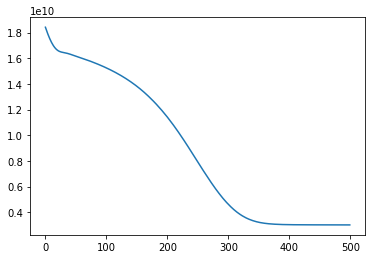

In [159]:
plt.plot(loss_values)

In [160]:
X_test_tens = torch.tensor(X_test.values).float()
y_test_tens = torch.tensor(y_test.values).float().reshape((-1, 1))

y_pred = model(X_test_tens)
loss = loss_fn(y_pred, y_test_tens)
torch.sqrt(loss)

tensor(56766.5273, grad_fn=<SqrtBackward0>)

## New

In [46]:
train.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [47]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [48]:
numerical_columns = train.describe().columns
numerical_columns = numerical_columns.drop('Id')
numerical_columns



Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [49]:
train.describe(include='object')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [50]:
categorical_colums = train.describe(include='object').columns
categorical_colums

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [51]:
train_numeric = train[numerical_columns].copy()
train_categoric = train[categorical_colums].copy()

<AxesSubplot: >

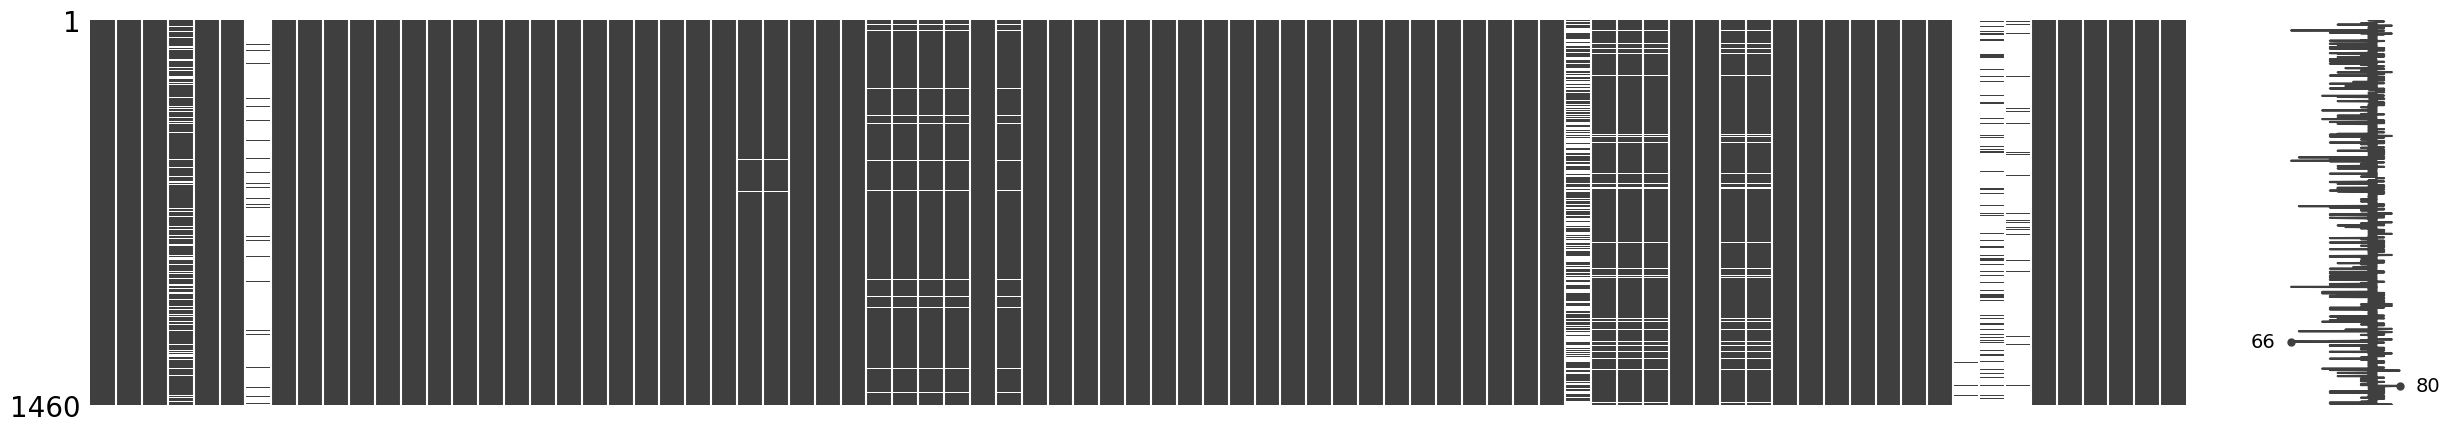

In [52]:
import missingno
missingno.matrix(train, figsize = (30,5))

<AxesSubplot: >

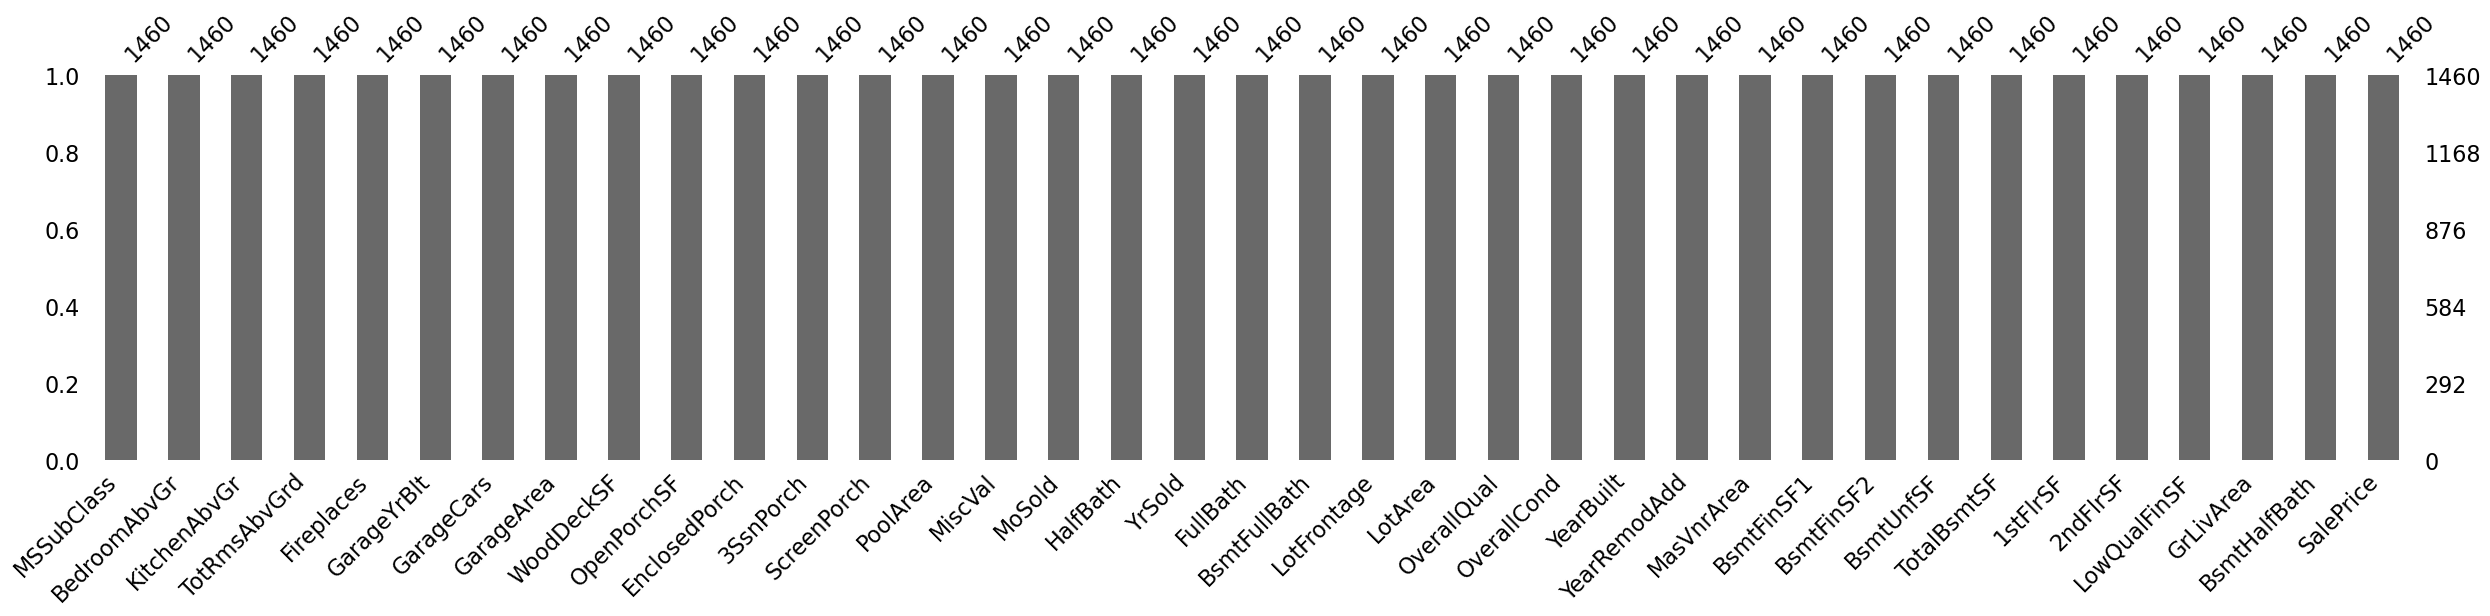

In [61]:
missingno.bar(train_numeric, sort='ascending', figsize = (30,5))

<AxesSubplot: >

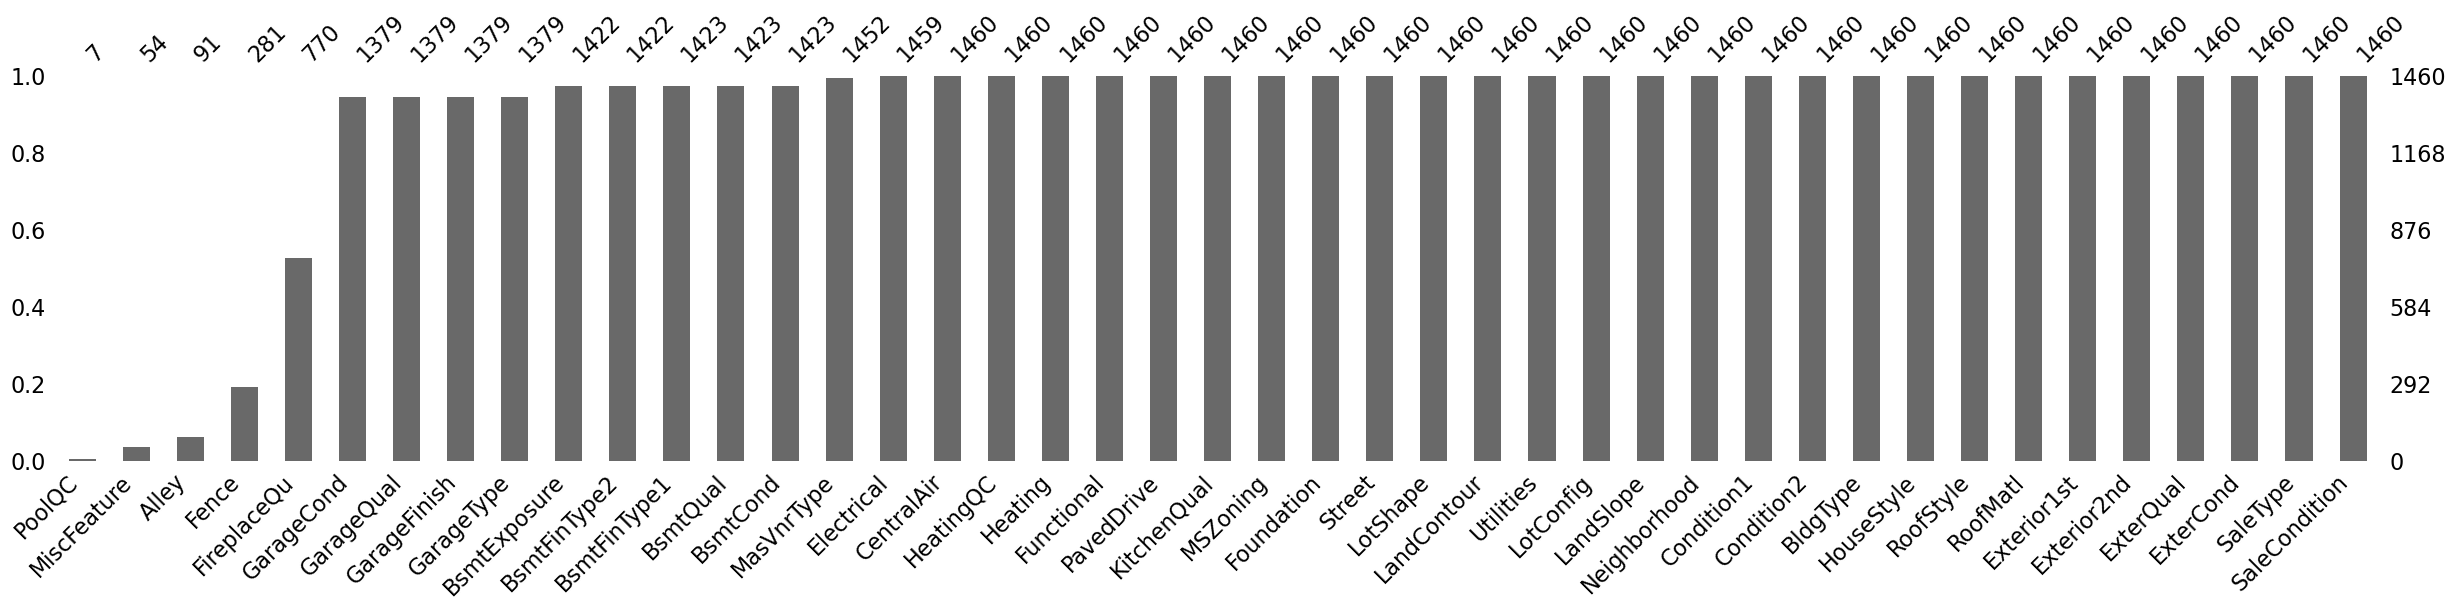

In [54]:
missingno.bar(train_categoric, sort='ascending', figsize = (30,5))

Deal with missing values in LotFrontage, MasVnrarea and GarageYrBlt

In [60]:
train_numeric['MasVnrArea'].fillna(train_numeric['MasVnrArea'].median(), inplace=True)
train_numeric['LotFrontage'].fillna(train_numeric['LotFrontage'].median(), inplace=True)
train_numeric['GarageYrBlt'].fillna(train_numeric['GarageYrBlt'].median(), inplace=True)
#train_numeric['GarageYrBlt'].min()

Deal with missing values in 

In [67]:
train_categoric.drop(['PoolQC'], axis=1, inplace=True)


In [69]:
train_categoric['Alley'].value_counts()


Grvl    50
Pave    41
Name: Alley, dtype: int64

In [71]:
lets_try = pd.get_dummies(train_categoric['Alley'])
lets_try.value_counts()

In [75]:
train_cat_OHE = pd.get_dummies(train_categoric, columns=train_categoric.columns)

In [76]:
train_cat_OHE.shape

(1460, 249)

<AxesSubplot: >

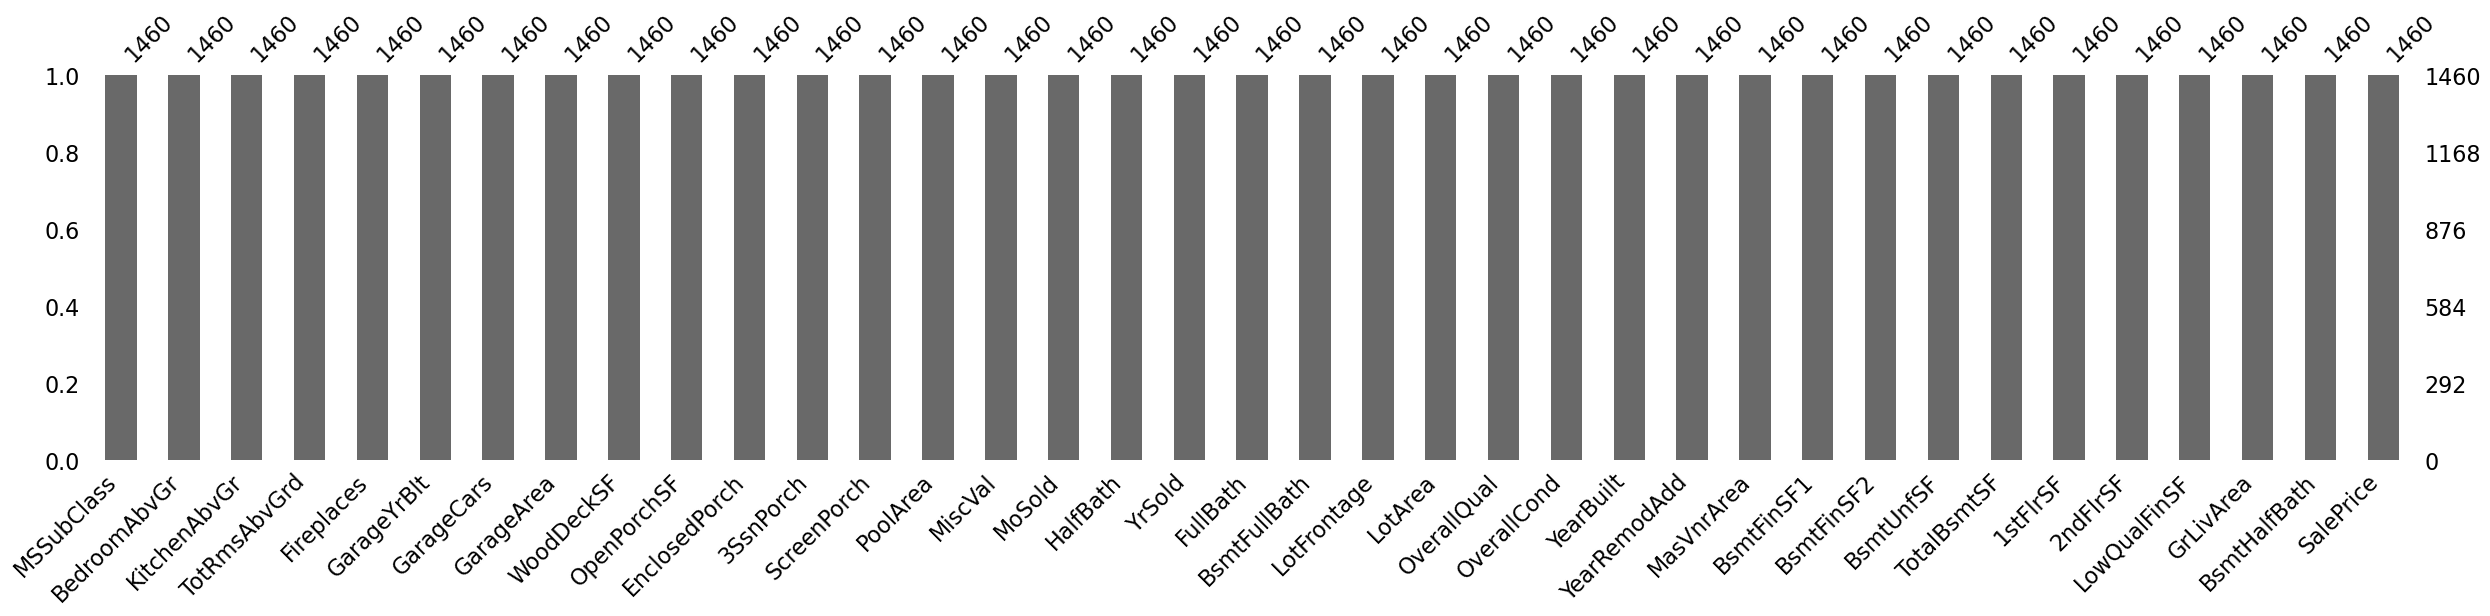

In [79]:
train_numeric.head()
missingno.bar(train_numeric, sort='ascending', figsize = (30,5))

In [84]:
train_cat_OHE.head()
index = (train_cat_OHE.isna().sum() > 0)
train_cat_OHE.isna().sum()[index]
train_cat_OHE['SaleType_ConLw']

0       0
1       0
2       0
3       0
4       0
       ..
1455    0
1456    0
1457    0
1458    0
1459    0
Name: SaleType_ConLw, Length: 1460, dtype: uint8

In [92]:
train_ready['SalePrice']

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [164]:
train_ready = pd.concat([train_numeric, train_cat_OHE], axis=1)
train_ready.head()
y = train_ready['SalePrice']
X = train_ready.drop('SalePrice', axis=1)



# Train test split

In [136]:
# Include intercept: needed in statsmodels
train_ready = sm.add_constant(train_ready)

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

In [137]:
# Fit linear regression model
model = sm.OLS(y_train, X_train).fit()

# View model summary
print(model.summary())
# model.rsquared



                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     55.06
Date:                Mon, 06 Mar 2023   Prob (F-statistic):               0.00
Time:                        17:17:24   Log-Likelihood:                -13194.
No. Observations:                1168   AIC:                         2.688e+04
Df Residuals:                     921   BIC:                         2.813e+04
Df Model:                         246                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
MSSubClass               33.98

In [139]:
print(f'shapes are train: {X_train.shape}, test: {X_test.shape}')
y_pred = model.predict(X_test)

print(r2_score_adj(y_test, y_pred, model))
print(sm.tools.eval_measures.rmse(y_test, y_pred))


shapes are train: (1168, 285), test: (292, 285)
-4.541663059374184
29604.389266276867


In [140]:
print(X_train.columns)
print(X_test.columns)

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=285)
Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=285)


In [141]:
model = feature_selection(X_train, y_train, X_test, y_test)

Current_highest: 0.5652644215673962, previous Highest: 0
Current_highest: 0.6815447197110639, previous Highest: 0.5652644215673962
Current_highest: 0.7456966248171389, previous Highest: 0.6815447197110639
Current_highest: 0.7807750332154803, previous Highest: 0.7456966248171389
Current_highest: 0.7937092875911661, previous Highest: 0.7807750332154803
Current_highest: 0.8065561541841775, previous Highest: 0.7937092875911661
Current_highest: 0.8203433259482614, previous Highest: 0.8065561541841775
Current_highest: 0.829954216836, previous Highest: 0.8203433259482614
Current_highest: 0.8398063110470645, previous Highest: 0.829954216836
Current_highest: 0.846314797677916, previous Highest: 0.8398063110470645
Current_highest: 0.8529777328040722, previous Highest: 0.846314797677916
Current_highest: 0.8584314734643496, previous Highest: 0.8529777328040722
Current_highest: 0.8631415026711851, previous Highest: 0.8584314734643496
Current_highest: 0.8670942989701155, previous Highest: 0.86314150

In [161]:
chosen_columns = list(model.params.index)

In [162]:
print(f'shapes are train: {X_train[chosen_columns].shape}, test: {X_test[chosen_columns].shape}')
print(X_train[chosen_columns].columns)
print(X_test[chosen_columns].columns)
# model.predict(X_train[chosen_columns])

shapes are train: (1168, 45), test: (292, 45)
Index(['MSSubClass', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtUnfSF',
       'TotalBsmtSF', 'LowQualFinSF', 'GrLivArea', 'BedroomAbvGr',
       'GarageCars', 'PoolArea', 'MSZoning_C (all)', 'MSZoning_RM',
       'LotConfig_FR2', 'LotConfig_Inside', 'Neighborhood_Crawfor',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown',
       'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Condition1_Norm', 'Condition2_PosN', 'BldgType_1Fam',
       'RoofMatl_ClyTile', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShngl',
       'Exterior1st_CemntBd', 'Exterior1st_Wd Sdng', 'Exterior2nd_VinylSd',
       'ExterQual_Fa', 'ExterQual_Gd', 'ExterQual_TA', 'BsmtQual_Ex',
       'BsmtExposure_Av', 'BsmtExposure_Gd', 'BsmtFinType1_GLQ',
       'HeatingQC_TA', 'KitchenQual_Ex', 'Functional_Maj1', 'GarageFinish_Fin',
       'Fence_GdPrv', 'SaleType_New', 'SaleCondition_Normal'],
      dtype='object')
Index(['MS

In [163]:
#print(model.summary())
y_pred = model.predict(X_test[chosen_columns])

print(r2_score_adj(y_test, y_pred, model))
print(sm.tools.eval_measures.rmse(y_test, y_pred))

0.9115078343936985
23954.12921217613


Is random forest better??

In [157]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 1000, max_features = 'sqrt', max_depth = 20, random_state = 18).fit(X_train, y_train)


In [158]:
y_pred = rf.predict(X_test)
sm.tools.eval_measures.rmse(y_test, y_pred)

33214.32503456419

Output

In [195]:
filename = 'data/test.csv'
test = pd.read_csv(filename)
test.shape


(1459, 80)

Get rid of nan

In [187]:
index_col = test['Id']
test.drop(['Id', 'PoolQC'], axis=1, inplace=True)
test['MasVnrArea'].fillna(test['MasVnrArea'].median(), inplace=True)
test['LotFrontage'].fillna(test['LotFrontage'].median(), inplace=True)
test['GarageYrBlt'].fillna(test['GarageYrBlt'].median(), inplace=True)


In [188]:
test = pd.get_dummies(test, columns=test.describe(include='object').columns)
test = sm.add_constant(test)

In [201]:
for col in chosen_columns:
    if col not in test:
        test[col] = 0

chosen_columns

In [202]:
y_pred = model.predict(test[chosen_columns])

In [204]:
y_pred.shape

(1459,)

In [206]:


submission = pd.DataFrame({"Id": index_col,"SalePrice": y_pred})
submission.to_csv('submission.csv', index=False)

